In [1]:
import geokit as gk
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

In [2]:
gk.__version__

'1.2.8'

# RegionMask
The RegionMask object is the geospatial representation of the given region, allows to combine raster and vector operations and many functions. 
The following shows only a few examples of these. 



Example for the Aachen-Region

In [3]:
# define the srs 
aachen_centered_srs = gk.srs.centeredLAEA(6.083, 50.775)

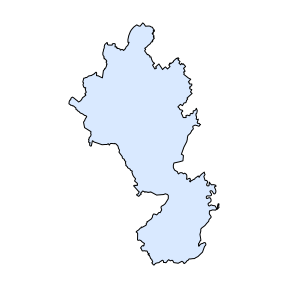

In [4]:
#load the region mask from the passed shape file
aachen_rm = gk.RegionMask.load(gk._test_data_["aachenShapefile.shp"], pixelRes=20, srs=aachen_centered_srs)
aachen_rm

In [5]:
# Print information about the region mask
print("aachen_rm.extent", aachen_rm.extent)
#print("aachen_rm.srs", aachen_rm.srs)
print("aachen_rm.pixelWidth", aachen_rm.pixelWidth)
print("aachen_rm.pixelHeight", aachen_rm.pixelHeight)

aachen_rm.extent (-7640.00000,-31220.00000,23820.00000,19500.00000)
aachen_rm.pixelWidth 20
aachen_rm.pixelHeight 20


## Region Mask and Raster-File

A RegionMask object allows raster data to be warped onto the RegionMask's characteristics (as in the RegionMask's resolution, extent, and spatial reference system). This create a numpy matrix, from which only the pixels which lie in the region can be easily extracted and operated on.


Example: Extract the GHI-data for Aachen from a raster-file for the GHI in Germany.


In [6]:
ras = aachen_rm.warp(gk._test_data_['gsa-ghi-like.tif'], returnMatrix=False)

Draw Raster file in RegionMask.

c:\users\ra.maier\code\geokit\geokit\core\raster.py:1560: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(h, cax=cbax, **tmp)


AxHands(ax=<matplotlib.axes._axes.Axes object at 0x000002153371C1C0>, handles=<matplotlib.image.AxesImage object at 0x00000215356908B0>, cbar=<matplotlib.colorbar.Colorbar object at 0x000002153569B400>)

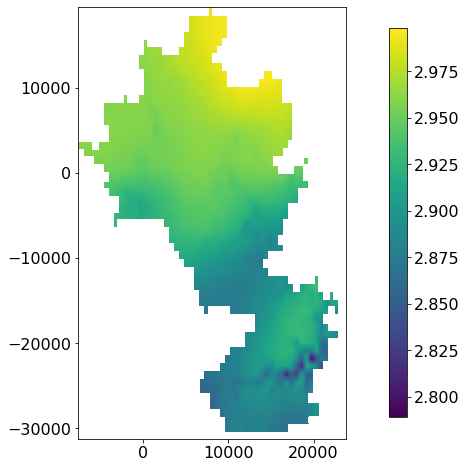

In [7]:
gk.drawRaster(ras, figsize=(6,6))

Raster values: Average values and histogram

In [8]:
# Get the average of raster values which are within the region mask 
aachen_rm.warp(gk._test_data_['gsa-ghi-like.tif'])[aachen_rm.mask].mean()

2.9310975

(array([1.93000e+02, 1.28100e+03, 4.91500e+03, 6.80170e+04, 3.40446e+05,
        1.96429e+05, 2.64498e+05, 2.99985e+05, 4.26737e+05, 1.71008e+05]),
 array([2.789051 , 2.8100007, 2.8309503, 2.8519   , 2.8728497, 2.8937993,
        2.914749 , 2.9356985, 2.9566483, 2.977598 , 2.9985476],
       dtype=float32),
 <BarContainer object of 10 artists>)

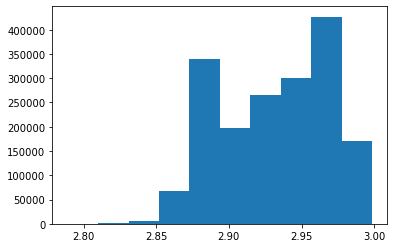

In [9]:
# plot histogramm of the values
plt.hist(aachen_rm.warp(gk._test_data_['gsa-ghi-like.tif'])[aachen_rm.mask])

## Region Mask and shp-file

Extract feature in a df.

In [10]:
aachen_points = aachen_rm.extractFeatures(gk._test_data_["turbinePlacements.shp"])
aachen_points.head()

,geom,FID
0,POINT (5.98519518411592 50.7972538800796),0
1,POINT (5.9946850348875 50.7942084158756),1
2,POINT (5.99410693905033 50.800938904832),2
3,POINT (6.0047500934257 50.7844315976052),3
4,POINT (6.00417362866228 50.7911621621515),4


1. Example: Show features in the region mask.

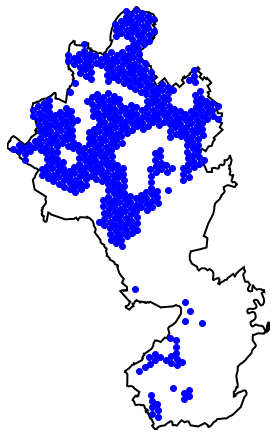

In [11]:
axh = aachen_rm.drawGeoms(aachen_points, figsize=(5,6), hideAxis=True, color='b')
plt.show()

2. Example: Indicate features directly in region mask. Include a buffer around the features.

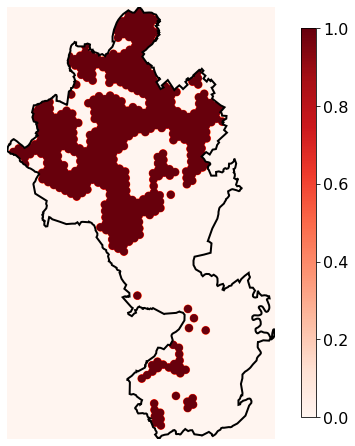

In [12]:
# Indicate RegionMask pixels within 500 meters of these points
isNearToTurbine = aachen_rm.indicateFeatures(gk._test_data_["turbinePlacements.shp"], buffer=500 )
# Visualize it!
axh = aachen_rm.drawImage(isNearToTurbine, figsize=(5,6), hideAxis=True, cmap='Reds', )
plt.show()

## Export a raster-tif-file for the region 

In [13]:
# Create a raster
example_data = np.ones_like(aachen_rm.mask)
aachen_rm.createRaster(data=example_data, output="rm_raster.tif")

'rm_raster.tif'

## Indicate areas with values

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x00000215363FBCA0>, handles=<matplotlib.image.AxesImage object at 0x00000215363C54F0>, cbar=<matplotlib.colorbar.Colorbar object at 0x00000215363C54C0>)

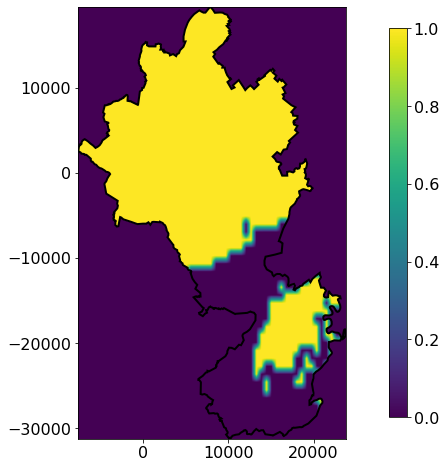

In [14]:
# Show areas with GHI values > 2.9
tmp = aachen_rm.indicateValues(
    source=gk._test_data_['gsa-ghi-like.tif'],
    value=(2.9,None),
)

aachen_rm.drawImage(tmp, figsize=(6,6))

AxHands(ax=<matplotlib.axes._axes.Axes object at 0x00000215363A2970>, handles=<matplotlib.image.AxesImage object at 0x00000215363645E0>, cbar=<matplotlib.colorbar.Colorbar object at 0x00000215363645B0>)

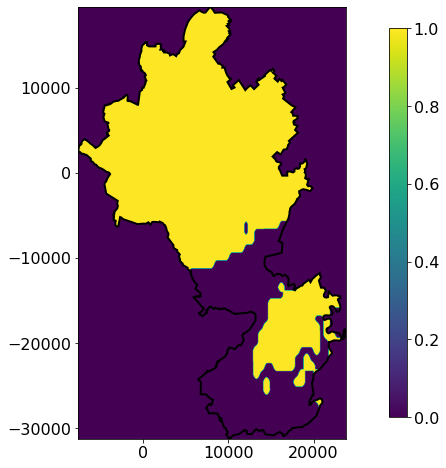

In [15]:
# Show areas with GHI values > 2.9 with buffer
tmp = aachen_rm.indicateValues(
    source=gk._test_data_['gsa-ghi-like.tif'],
    value=(2.9,None),
    buffer=100
)

aachen_rm.drawImage(tmp, figsize=(6,6))